importing libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import cv2
import os


In [4]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPool2D, Dropout, Dense, Flatten
from keras.models import Sequential, load_model

Image Processing

In [5]:
data=[]
labels=[]
classes=43
# cur_dir=os.getcwd()

for i in range(classes):
    path = os.path.join('../input/gtsrb-german-traffic-sign/Train',str(i))
    images = os.listdir(path)
    
    for a in images:
        try:
            image = Image.open(path + '//'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
            
        except:
            print("Error loading image")
 

    

In [6]:
# converting list to numpy arrays
    
data=np.array(data)
labels=np.array(labels)
    

In [7]:
print('data_shape {}, labels_shape  {}' .format(data.shape,labels.shape))

data_shape (39209, 30, 30, 3), labels_shape  (39209,)


In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data,labels,test_size=0.2,random_state=42)


In [9]:
print(X_train.shape,X_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3)


In [10]:
y_train=to_categorical(y_train,43)
y_test=to_categorical(y_test,43)

In [11]:
X_train.shape[1:]

(30, 30, 3)

In [12]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))


In [13]:
import keras

In [14]:
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [15]:
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.RMSprop(lr=0.0001), metrics=['accuracy'])

In [16]:
# epochs = 10
history = model.fit(X_train, y_train, batch_size=32, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
981/981 [==============================] - 5s 5ms/step - loss: 3.5629 - accuracy: 0.2791 - val_loss: 1.5597 - val_accuracy: 0.6561
Epoch 2/30
981/981 [==============================] - 4s 4ms/step - loss: 1.5593 - accuracy: 0.5840 - val_loss: 0.8162 - val_accuracy: 0.8360
Epoch 3/30
981/981 [==============================] - 4s 5ms/step - loss: 0.9725 - accuracy: 0.7343 - val_loss: 0.4810 - val_accuracy: 0.8861
Epoch 4/30
981/981 [==============================] - 4s 4ms/step - loss: 0.6736 - accuracy: 0.8163 - val_loss: 0.3453 - val_accuracy: 0.9362
Epoch 5/30
981/981 [==============================] - 4s 4ms/step - loss: 0.4844 - accuracy: 0.8686 - val_loss: 0.1667 - val_accuracy: 0.9686
Epoch 6/30
981/981 [==============================] - 5s 5ms/step - loss: 0.3743 - accuracy: 0.8995 - val_loss: 0.1202 - val_accuracy: 0.9764
Epoch 7/30
981/981 [==============================] - 5s 5ms/step - loss: 0.2988 - accuracy: 0.9204 - val_loss: 0.0931 - val_accuracy: 0.9801
Epoch 

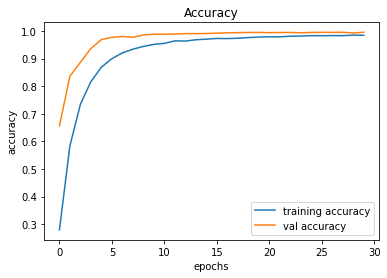

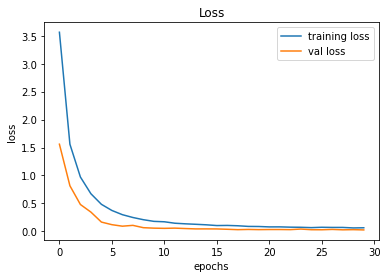

In [17]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


In [ ]:
# from keras.models import load_model

In [18]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [19]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = model.predict_classes(X_test)
    return image,Y_pred

Predicted traffic sign is:  Priority road


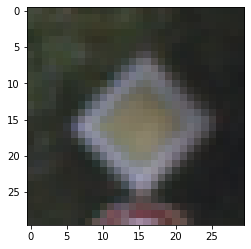

In [52]:
plot,prediction = test_on_img('../input/gtsrb-german-traffic-sign/Test/00684.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()
# confusion_matrix(y_test,prediction)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,Y_pred)

In [ ]:
classes = { :'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons' }